# PreProcessing

## Import Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import Data

In [2]:
subDataFile = ".\\dataProfitMarginSubset.csv"
data = pd.read_csv(subDataFile)
data = data.drop_duplicates('id')
print(data.columns)
data.head(3)

Index(['id', 'title', 'production_companies', 'production_countries', 'adult',
       'popularity', 'release_date', 'runtime', 'vote_average', 'vote_count',
       'actors_AveRating_average', 'actors_AveRating_total',
       'actors_RankedAveRating_average', 'actors_RankedAveRating_total',
       'actors_Top3AveRating_total', 'actors_VoteAve_average',
       'actors_VoteAve_total', 'actors_RankedVoteAve_average',
       'actors_RankedVoteAve_total', 'actors_Top3VoteAve_total',
       'actors_HistAve_average', 'actors_HistAve_total',
       'actors_RankedHistAve_average', 'actors_RankedHistAve_total',
       'actors_Top3HistAve_total', 'actors_AllMovieAve_average',
       'actors_AllMovieAve_total', 'actors_RankedAllMovieAve_average',
       'actors_RankedAllMovieAve_total', 'actors_Top3RankedAllMovieAve_total',
       'actors_AllMovieVoteAve_average', 'actors_AllMovieVoteAve_total',
       'actors_RankedAllMovieVoteAve_average',
       'actors_RankedAllMovieVoteAve_total',
       'acto

,id,title,production_companies,production_countries,adult,popularity,release_date,runtime,vote_average,vote_count,...,editorTot_HistAveRating,editorTot_AllAveRating,editorTot_AllVoteAveRating,keywordTot_AveRating,genreTot_RankedAveRating,budget,revenue,Domestic,BoxOfficeProfitMargin,profit_margin
0,862,Toy Story,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",True,21.946943,1995-10-30,81.0,7.7,5415.0,...,20.683709,6.726190,7.524399,6.378346,5.913436,30000000.0,373554033.0,223225679.0,644.085597,1145.18011
1,8844,Jumanji,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",True,17.015539,1995-12-15,104.0,6.9,2413.0,...,7.352651,6.227273,6.474549,6.078460,5.739320,65000000.0,262797249.0,100499940.0,54.615292,304.30346
2,15602,Grumpier Old Men,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",True,11.712900,1995-12-22,101.0,6.5,92.0,...,NaN,NaN,NaN,6.144337,5.756752,25000000.0,71500000.0,71518503.0,186.074012,186.00000


In [3]:
data.dropna(subset=['budget', 'Domestic'], inplace=True)

#cut out budgets under $2000 (value found in EDA)
data = data[data['budget']>2000]

#generate profit Ratio
data['profitRatio'] = data['Domestic']/data['budget']
data.dropna(subset=['profitRatio'], inplace=True)

## Split Data into Training/Test Sets

In [4]:
from sklearn.model_selection import train_test_split
X = data.loc[:, ~data.columns.isin(['id', 
                                    'title', 
                                    'production_companies', 
                                    'production_countries', 
                                    'adult',
                                    'BoxOfficeProfitMargin',
                                    'profit_margin',
                                    'release_date',
                                    'budget',
                                    'revenue',
                                    'Domestic',
                                    'profitRatio'])]
y = data[['profitRatio']]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)

## Fill Null values in X sets, add ouput parameter to y sets

In [5]:
generatedColumnList = ['actors_AveRating_average', 'actors_AveRating_total',
       'actors_RankedAveRating_average', 'actors_RankedAveRating_total',
       'actors_Top3AveRating_total', 'actors_VoteAve_average',
       'actors_VoteAve_total', 'actors_RankedVoteAve_average',
       'actors_RankedVoteAve_total', 'actors_Top3VoteAve_total',
       'actors_HistAve_average', 'actors_HistAve_total',
       'actors_RankedHistAve_average', 'actors_RankedHistAve_total',
       'actors_Top3HistAve_total', 'actors_AllMovieAve_average',
       'actors_AllMovieAve_total', 'actors_RankedAllMovieAve_average',
       'actors_RankedAllMovieAve_total', 'actors_Top3RankedAllMovieAve_total',
       'actors_AllMovieVoteAve_average', 'actors_AllMovieVoteAve_total',
       'actors_RankedAllMovieVoteAve_average',
       'actors_RankedAllMovieVoteAve_total',
       'actors_Top3RankedAllMovieVoteAve_total', 'directorTot_AveRating',
       'directorTot_VoteAveRating', 'directorTot_HistAveRating',
       'directorTot_AllAveRating',
       'directorTot_AllVoteAveRating','screenwriterTot_AveRating',
       'screenwriterTot_VoteAveRating', 'screenwriterTot_HistAveRating',
       'screenwriterTot_AllAveRating','screenwriterTot_AllVoteAveRating',
       'editorTot_AveRating', 'editorTot_VoteAveRating',
       'editorTot_HistAveRating', 'editorTot_AllAveRating',
       'editorTot_AllVoteAveRating', 'keywordTot_AveRating',
       'genreTot_RankedAveRating'];

data[generatedColumnList].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6359 entries, 0 to 7584
Data columns (total 42 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   actors_AveRating_average                6277 non-null   float64
 1   actors_AveRating_total                  6277 non-null   float64
 2   actors_RankedAveRating_average          6277 non-null   float64
 3   actors_RankedAveRating_total            6277 non-null   float64
 4   actors_Top3AveRating_total              6206 non-null   float64
 5   actors_VoteAve_average                  6275 non-null   float64
 6   actors_VoteAve_total                    6275 non-null   float64
 7   actors_RankedVoteAve_average            6275 non-null   float64
 8   actors_RankedVoteAve_total              6275 non-null   float64
 9   actors_Top3VoteAve_total                6205 non-null   float64
 10  actors_HistAve_average                  6277 non-null   floa

#### Fill null values of X columns with median of that column in Train set  (avoids data leakage)

In [6]:
medianReplacements = {}

for param in generatedColumnList:
    med = X_train[X_train[param].notnull()][param].median()
    medianReplacements[param] = med

X_train = X_train.fillna(value = medianReplacements)
X_test = X_test.fillna(value = medianReplacements)

#### Cut Outliers out of Training Set

In [9]:
print(X_train.shape)
print(y_train.shape)

for col in y_train.columns:
    mean = y_train[col].mean()
    std = y_train[col].std()

    y_train = y_train[(y_train[col]<=mean+3*std) & (y_train[col]>=mean-3*std)]

X_train = X_train.filter(items = y_train.index, axis=0)
print(X_train.shape)
print(y_train.shape)

(4250, 46)
(4250, 1)
(4176, 46)
(4176, 1)


#### Add boxcox parameter to Y 

C:\Users\Karl\AppData\Local\Temp/ipykernel_7724/519899423.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test[boxCoxString] = y_test['profitRatio']**lamb - 1


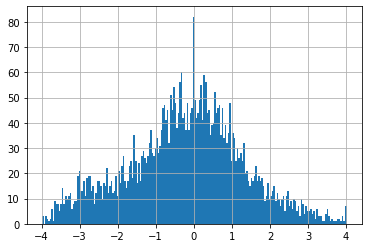

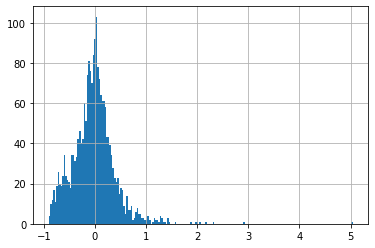

In [10]:
import scipy.stats
boxCoxString = 'profitRatio_BoxCox'

ret, lamb = scipy.stats.boxcox(y_train['profitRatio'])
y_train[boxCoxString] = ret


if(lamb == 0):
    y_test[boxCoxString] = y_test['profitRatio'].apply(log)
else:
    y_test[boxCoxString] = y_test['profitRatio']**lamb - 1
    
y_train[boxCoxString].hist(bins=200)
plt.show()

y_test[boxCoxString].hist(bins=200)
plt.show()

## Normalize X parameters

In [11]:
from sklearn.preprocessing import StandardScaler


scalar = StandardScaler()
X_train_fitted = scalar.fit_transform(X_train)
X_train_fitted = pd.DataFrame(X_train_fitted, columns=X_train.columns)
print(X_train_fitted.shape)


print(X_train_fitted.shape)

X_test_fitted = scalar.transform(X_test)
X_test_fitted = pd.DataFrame(X_test_fitted, columns=X_test.columns) 


(4176, 46)
(4176, 46)


In [12]:
X_train_fitted.describe()

,popularity,runtime,vote_average,vote_count,actors_AveRating_average,actors_AveRating_total,actors_RankedAveRating_average,actors_RankedAveRating_total,actors_Top3AveRating_total,actors_VoteAve_average,...,screenwriterTot_HistAveRating,screenwriterTot_AllAveRating,screenwriterTot_AllVoteAveRating,editorTot_AveRating,editorTot_VoteAveRating,editorTot_HistAveRating,editorTot_AllAveRating,editorTot_AllVoteAveRating,keywordTot_AveRating,genreTot_RankedAveRating
count,4.176000e+03,4.176000e+03,4.176000e+03,4.176000e+03,4.176000e+03,4.176000e+03,4.176000e+03,4.176000e+03,4.176000e+03,4.176000e+03,...,4.176000e+03,4.176000e+03,4.176000e+03,4.176000e+03,4.176000e+03,4.176000e+03,4.176000e+03,4.176000e+03,4.176000e+03,4.176000e+03
mean,-5.543139e-17,1.731001e-16,2.989307e-16,7.029286e-17,-8.485523e-16,2.326789e-16,6.266273e-17,-1.577203e-16,-8.459602e-17,1.781674e-15,...,-2.098816e-16,3.952461e-16,6.653097e-16,-1.040169e-17,1.812460e-15,-7.093092e-17,-1.716991e-15,4.059386e-16,7.939318e-16,4.795228e-15
std,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00,...,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00
min,-6.764539e-01,-5.029506e+00,-6.687450e+00,-5.371313e-01,-1.586480e+01,-1.387550e+00,-3.160608e+00,-2.306318e+00,-5.267576e+00,-6.290754e+00,...,-1.767595e+00,-6.260066e+00,-6.176331e+00,-1.081962e+01,-5.974417e+00,-1.482610e+00,-6.951096e+00,-6.684178e+00,-9.374299e+00,-4.207076e+00
25%,-2.994198e-01,-6.351307e-01,-5.425857e-01,-4.848428e-01,-4.819367e-01,-5.913858e-01,-4.518502e-01,-6.739269e-01,1.117556e-02,-5.646448e-01,...,-2.092030e-01,-2.587966e-01,-2.667942e-01,-2.540145e-01,-3.615234e-01,-5.621926e-01,-4.562337e-01,-5.251999e-01,-5.535738e-01,-3.872736e-01
50%,-9.974932e-02,-1.725649e-01,1.042421e-01,-3.600251e-01,1.765672e-02,-2.276933e-01,-1.504836e-02,-2.234494e-01,3.545860e-01,3.686881e-02,...,-2.092030e-01,5.094627e-02,6.705947e-02,5.089682e-02,3.932727e-02,-2.178810e-01,1.110809e-02,2.313002e-02,1.059071e-02,1.055533e-01
75%,1.449897e-01,4.287706e-01,6.432654e-01,4.307490e-03,5.272723e-01,2.942449e-01,4.261993e-01,3.820921e-01,5.571395e-01,6.134515e-01,...,-2.092030e-01,3.219713e-01,3.648766e-01,3.658325e-01,4.213790e-01,2.274565e-01,4.614741e-01,5.516321e-01,5.501057e-01,6.208853e-01
max,3.907457e+01,1.449077e+01,2.691554e+00,9.679363e+00,5.419320e+00,2.057583e+01,1.572140e+01,5.131285e+00,1.945871e+00,4.614903e+00,...,1.102315e+01,3.806579e+00,3.771883e+00,6.657647e+00,6.053071e+00,7.881670e+00,4.129026e+00,3.080235e+00,6.304164e+00,3.688168e+00


In [13]:
y_train.head()

,profitRatio,profitRatio_BoxCox
4668,0.654614,-0.403557
4142,1.808176,0.634930
5611,0.426943,-0.772372
704,0.902402,-0.101482
6472,7.337038,2.533473


# Machine Learning

In [22]:
from sklearn.metrics import max_error, mean_absolute_error, mean_squared_error, median_absolute_error, r2_score

from sklearn import svm
from sklearn.linear_model import SGDRegressor, BayesianRidge, LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

def tryModels(x_tr, x_te, y_tr, y_te):

    models = []
    models.append(['SVR',svm.SVR()])
    models.append(['SGD',SGDRegressor()])
    models.append(['kNN',KNeighborsRegressor()])
    models.append(['RandForr',RandomForestRegressor()])
    models.append(['AdaBoost',AdaBoostRegressor()])
    models.append(['BayesianRidge',BayesianRidge(compute_score=True)])
    models.append(['Linear',LinearRegression()])

    modelMetrics =[]

    for mod in models:
        thisModelDict = {}
        thisModelDict['name']= mod[0]

        for y_col in y_tr.columns:
            model=mod[1]
            model.fit(x_tr, y_train[y_col])
            ypred = model.predict(x_te)

            thisModelDict[y_col+'_MSE']=mean_squared_error(y_te[y_col],ypred)
            thisModelDict[y_col+'_MAE']=mean_absolute_error(y_te[y_col],ypred)
            thisModelDict[y_col+'_r2']= r2_score(y_te[y_col],ypred)
        
        modelMetrics.append(thisModelDict)


    modDf = pd.DataFrame(modelMetrics)
    for col in modDf.columns:
        if(col=='name'):
            continue

        modDf.plot.bar(x='name', y=col, rot=90)
        plt.show()

In [15]:
def plotPredVsMeasured(ypred, ymeas):
    plt.scatter(ymeas, ypred)
    xs = range(round(ymeas.min()), round(ymeas.max()))
    
    plt.title('Y Measured vs Y Prediction')
    plt.xlabel('Y Measured')
    plt.ylabel('Y Prediction')
    plt.plot(xs, xs, c='r')
    plt.show()
    
def plotErrorHist(ypred, ymeas):
    err = ypred - ymeas
    plt.hist(err, bins = 100)
    plt.show()

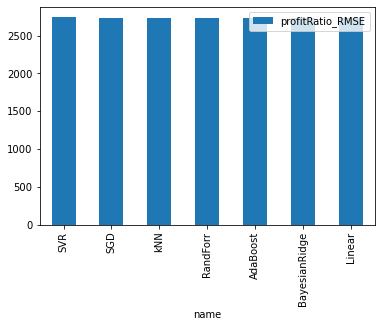

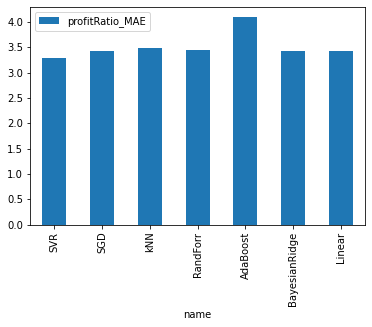

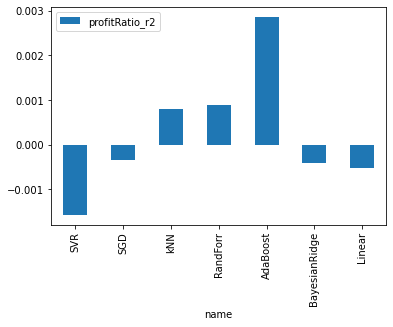

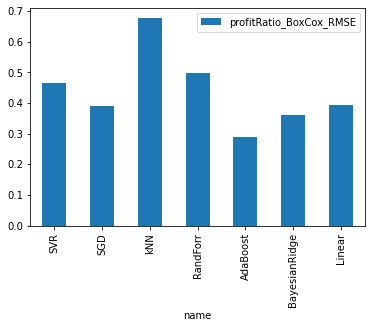

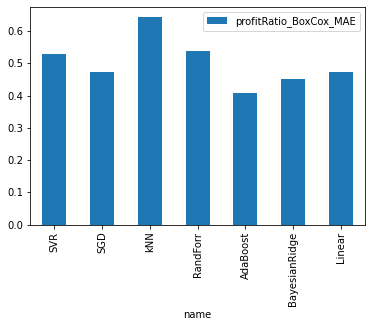

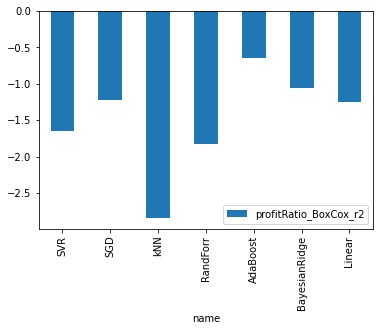

In [16]:
tryModels(X_train_fitted,X_test_fitted,y_train, y_test)

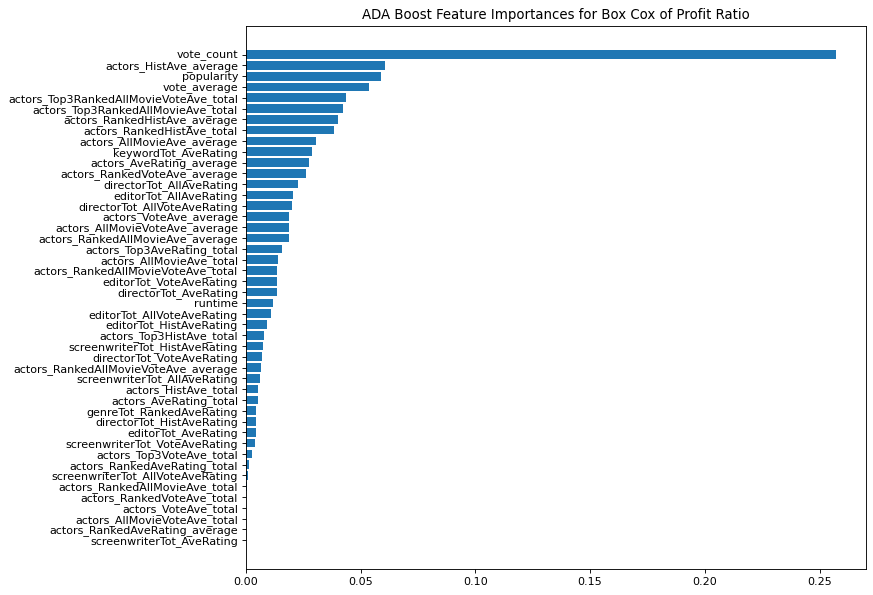

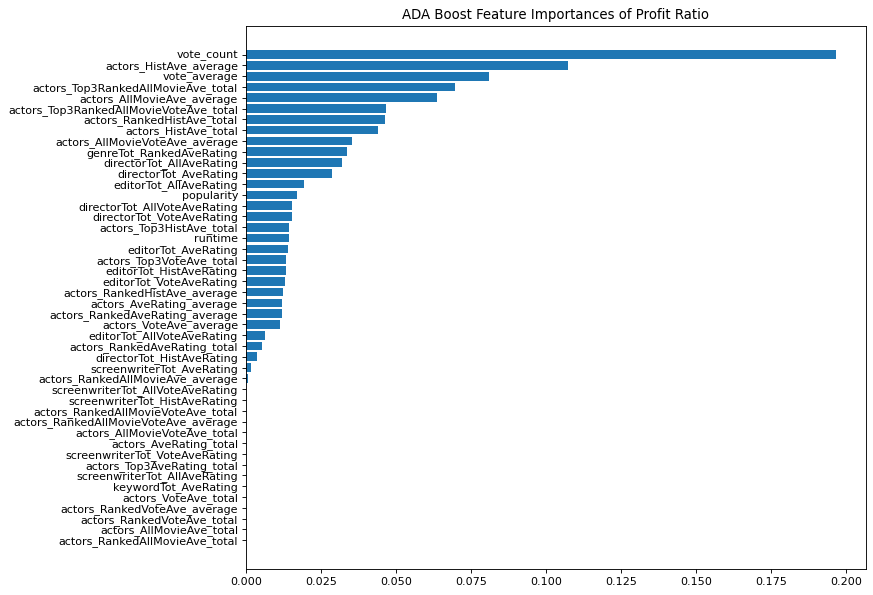

In [19]:
from matplotlib.pyplot import figure

figure(figsize=(10, 9), dpi=80)
mod = AdaBoostRegressor()
mod.fit(X_train_fitted,y_train[boxCoxString])
featuresDict = {'featureName': X_train_fitted.columns, 'ADA_importances':mod.feature_importances_}
featuresDF_boxCox = pd.DataFrame(featuresDict).sort_values(by='ADA_importances')

plt.title('ADA Boost Feature Importances for Box Cox of Profit Ratio')
plt.barh(featuresDF_boxCox.featureName, featuresDF_boxCox.ADA_importances)

plt.show()


figure(figsize=(10, 9), dpi=80)
mod.fit(X_train_fitted,y_train.profitRatio)
featuresDict = {'featureName': X_train_fitted.columns, 'ADA_importances':mod.feature_importances_}
featuresDF = pd.DataFrame(featuresDict).sort_values(by='ADA_importances')

plt.title('ADA Boost Feature Importances of Profit Ratio')
plt.barh(featuresDF.featureName, featuresDF.ADA_importances)

plt.show()

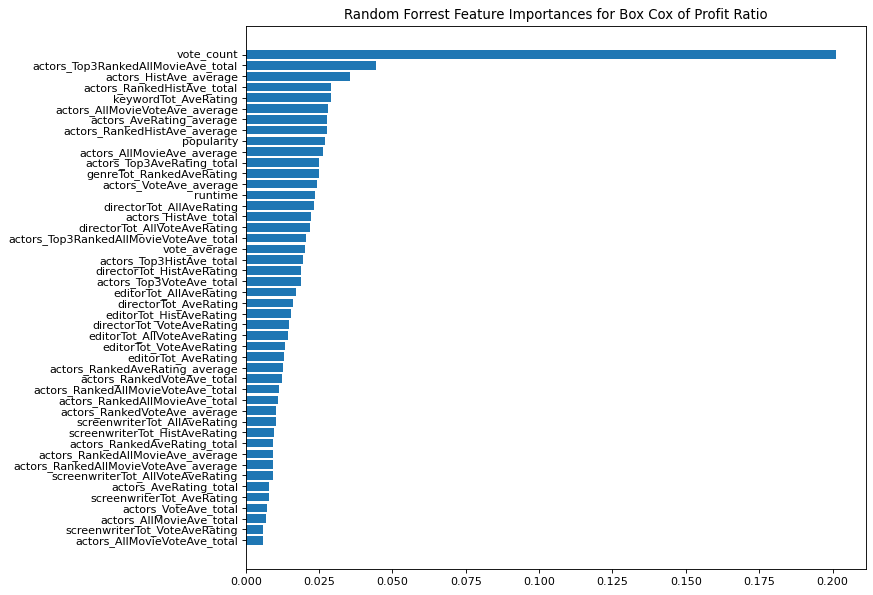

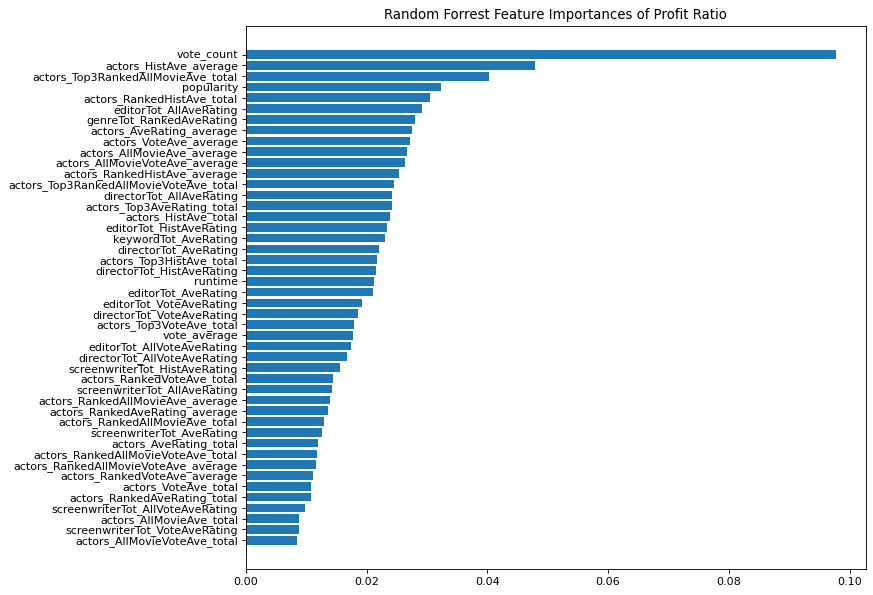

In [20]:
figure(figsize=(10, 9), dpi=80)
mod = RandomForestRegressor()
mod.fit(X_train_fitted,y_train[boxCoxString])
featuresDict = {'featureName': X_train_fitted.columns, 'RF_importances':mod.feature_importances_}
featuresRF_boxCox = pd.DataFrame(featuresDict).sort_values(by='RF_importances')

plt.title('Random Forrest Feature Importances for Box Cox of Profit Ratio')
plt.barh(featuresRF_boxCox.featureName, featuresRF_boxCox.RF_importances)

plt.show()


figure(figsize=(10, 9), dpi=80)
mod.fit(X_train_fitted,y_train.profitRatio)
featuresDict = {'featureName': X_train_fitted.columns, 'RF_importances':mod.feature_importances_}
featuresRF = pd.DataFrame(featuresDict).sort_values(by='RF_importances')

plt.title('Random Forrest Feature Importances of Profit Ratio')
plt.barh(featuresRF.featureName, featuresRF.RF_importances)

plt.show()

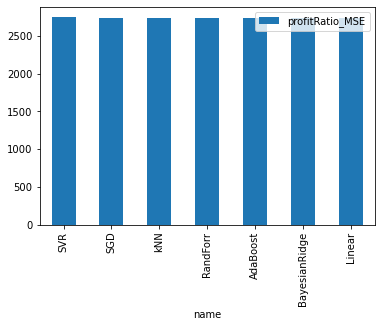

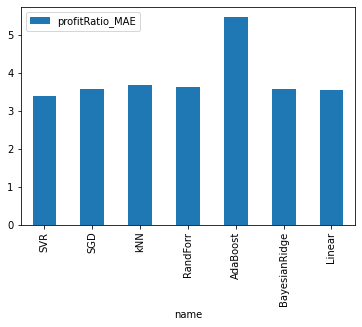

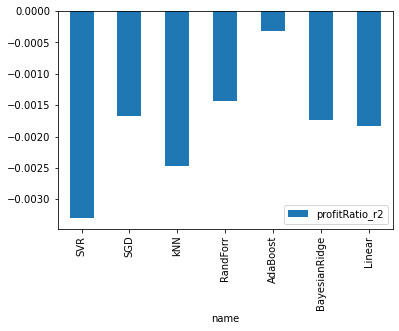

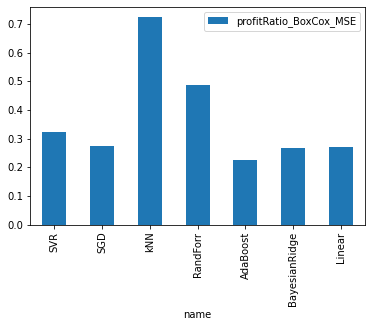

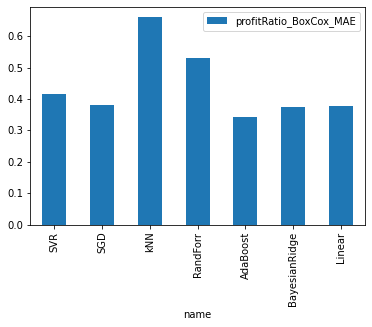

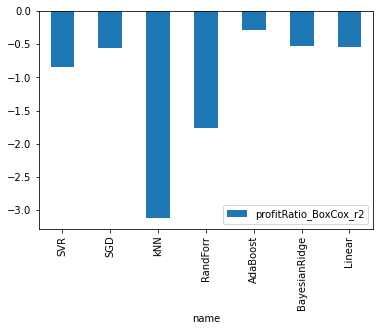

In [24]:
importantFeatures = np.array(featuresDF.head(6).featureName)
tryModels(X_train_fitted[importantFeatures],X_test_fitted[importantFeatures],y_train, y_test)

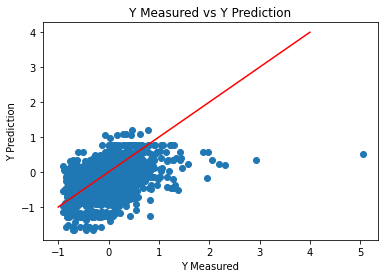

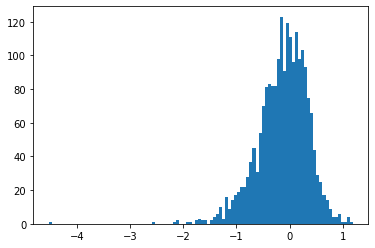

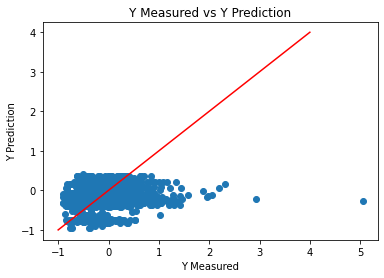

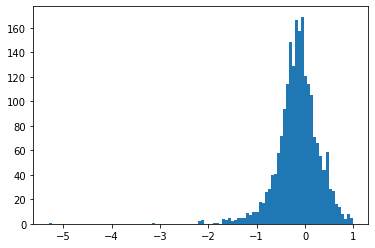

In [25]:
ada = AdaBoostRegressor()
ada.fit(X_train_fitted, y_train.profitRatio_BoxCox)
ypred = ada.predict(X_test_fitted)

plotPredVsMeasured(ypred, y_test.profitRatio_BoxCox)
plotErrorHist(ypred, y_test.profitRatio_BoxCox)

ada = AdaBoostRegressor()
ada.fit(X_train_fitted[importantFeatures], y_train.profitRatio_BoxCox)
ypred = ada.predict(X_test_fitted[importantFeatures])

plotPredVsMeasured(ypred, y_test.profitRatio_BoxCox)
plotErrorHist(ypred, y_test.profitRatio_BoxCox)

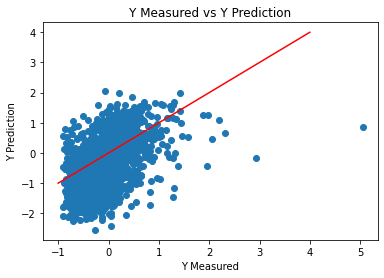

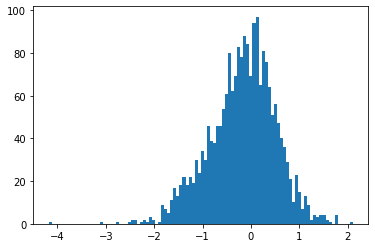

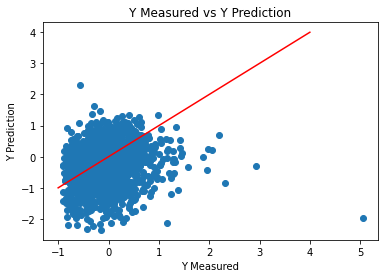

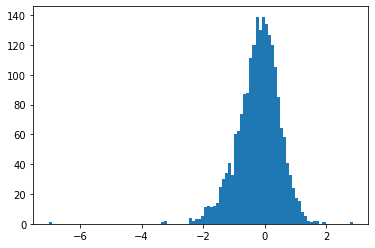

In [26]:
rf = RandomForestRegressor()
rf.fit(X_train_fitted, y_train.profitRatio_BoxCox)
ypred = rf.predict(X_test_fitted)

plotPredVsMeasured(ypred, y_test.profitRatio_BoxCox)
plotErrorHist(ypred, y_test.profitRatio_BoxCox)

importantFeatures = np.array(featuresRF.head(7).featureName)
rf = RandomForestRegressor()
rf.fit(X_train_fitted[importantFeatures], y_train.profitRatio_BoxCox)
ypred = rf.predict(X_test_fitted[importantFeatures])

plotPredVsMeasured(ypred, y_test.profitRatio_BoxCox)
plotErrorHist(ypred, y_test.profitRatio_BoxCox)

### Optimize Ada Boost with Bayesian Optimization

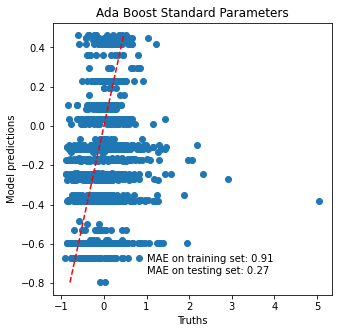

In [33]:
ada = AdaBoostRegressor()
ada.fit(X_train_fitted[importantFeatures], y_train.profitRatio_BoxCox)


y_pred = ada.predict(X_train_fitted[importantFeatures])
mae = median_absolute_error(y_train.profitRatio_BoxCox, y_pred)
string_score = f"MAE on training set: {mae:.2f}"


y_pred = ada.predict(X_test_fitted[importantFeatures])
mae = median_absolute_error(y_test.profitRatio_BoxCox, y_pred)
string_score += f"\nMAE on testing set: {mae:.2f}"
fig, ax = plt.subplots(figsize=(5, 5))
plt.scatter(y_test.profitRatio_BoxCox, y_pred)
ax.plot([y_pred.min(), y_pred.max()], [y_pred.min(), y_pred.max()], ls="--", c="red")
plt.text(1,-.75,string_score)
plt.title("Ada Boost Standard Parameters")
plt.ylabel("Model predictions")
plt.xlabel("Truths")
plt.show()

In [28]:
coefs = pd.DataFrame(
    ada.feature_importances_,
    columns=["Feature Importances"],
    index=importantFeatures
)

coefs

,Feature Importances
actors_AllMovieVoteAve_total,0.341224
screenwriterTot_VoteAveRating,0.038713
actors_AllMovieAve_total,0.061418
screenwriterTot_AllVoteAveRating,0.283253
actors_RankedAveRating_total,0.145191
actors_VoteAve_total,0.068089
actors_RankedVoteAve_average,0.062113


In [65]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.tree import DecisionTreeRegressor
from bayes_opt import BayesianOptimization

def MAEScoreFunction(estimator,  X, y):
    ypred = estimator.predict(X)
    return -1*mean_absolute_error(ypred,y)

def MSEScoreFunction(estimator,  X, y):
    ypred = estimator.predict(X)
    return -1*mean_squared_error(ypred,y)

def ada_eval(n_estimators, 
                learning_rate,
                max_depth,
                max_features,
                min_samples_split, 
                min_samples_leaf, 
                min_weight_fraction_leaf,
                max_leaf_nodes,
                min_impurity_decrease, 
                ccp_alpha):

    tree = DecisionTreeRegressor(max_depth=round(max_depth),
                                 max_features = round(max_features),
                                min_samples_split=round(min_samples_split), 
                                min_samples_leaf=round(min_samples_leaf), 
                                min_weight_fraction_leaf=min_weight_fraction_leaf,
                                max_leaf_nodes=round(max_leaf_nodes),
                                min_impurity_decrease=min_impurity_decrease, 
                                ccp_alpha=ccp_alpha)
    
    ada = AdaBoostRegressor(base_estimator=tree, 
                            n_estimators=round(n_estimators),
                            learning_rate=learning_rate,
                           random_state=42)
    
    cv_model = cross_val_score(
        ada,
        X_train_fitted,
        y_train.profitRatio_BoxCox,
        cv=RepeatedKFold(n_splits=5, n_repeats=2),
        n_jobs=2
    )

    return cv_model.mean()




In [67]:
DecTreeFeatures= ['max_depth',
                    'min_samples_split',
                    'min_samples_leaf',
                    'min_weight_fraction_leaf',
                    'max_leaf_nodes',
                    'min_impurity_decrease',
                    'ccp_alpha',
                    'max_features']
AdaFeatures = ['n_estimators',
                    'learning_rate']

adaBO = BayesianOptimization(ada_eval, {'n_estimators': (60, 80),
                                        'learning_rate': (.1, 10),
                                        'max_depth': (10, 45),
                                        'min_samples_split': (10, 50),
                                        'min_samples_leaf': (1, 10),
                                        'min_weight_fraction_leaf': (0.15, 0.5),
                                        'max_leaf_nodes': (100,200),
                                        'min_impurity_decrease': (0.0,20),
                                        'ccp_alpha': (0.0, 2),
                                        'max_features':(3,len(X_train_fitted.columns))
                                       })

adaBO.maximize(n_iter=1000, init_points=20)

|   iter    |  target   | ccp_alpha | learni... | max_depth | max_fe... | max_le... | min_im... | min_sa... | min_sa... | min_we... | n_esti... |
-------------------------------------------------------------------------------------------------------------------------------------------------
|  1        | -0.001292 |  0.2846   |  3.373    |  33.0     |  30.26    |  110.5    |  14.33    |  5.069    |  21.41    |  0.2264   |  73.41    |
|  2        | -0.000813 |  0.8308   |  1.275    |  11.0     |  36.27    |  147.3    |  19.69    |  6.427    |  25.13    |  0.3566   |  69.84    |
|  3        | -0.001642 |  1.515    |  3.994    |  29.48    |  18.71    |  187.7    |  19.11    |  9.138    |  18.8     |  0.224    |  68.21    |
|  4        | -0.001351 |  1.317    |  4.634    |  16.76    |  36.15    |  169.9    |  1.737    |  5.661    |  40.26    |  0.3684   |  74.69    |
|  5        | -0.002652 |  0.2367   |  2.147    |  30.09    |  24.12    |  107.9    |  5.144    |  9.018    |  27.88    |  0

|  34       | -0.001144 |  2.0      |  3.634    |  30.49    |  3.0      |  148.5    |  20.0     |  1.0      |  16.38    |  0.5      |  67.33    |
|  35       | -0.001448 |  2.0      |  0.1      |  24.65    |  44.47    |  183.7    |  20.0     |  10.0     |  12.61    |  0.5      |  80.0     |
|  36       | -0.002925 |  2.0      |  0.1      |  20.71    |  44.86    |  165.1    |  20.0     |  10.0     |  40.14    |  0.5      |  80.0     |
|  37       | -0.00137  |  0.0      |  0.1      |  28.07    |  23.6     |  135.1    |  20.0     |  10.0     |  21.2     |  0.5      |  60.0     |
|  38       | -0.001552 |  2.0      |  0.1      |  39.89    |  46.0     |  120.0    |  20.0     |  10.0     |  39.33    |  0.5      |  60.0     |
|  39       | -0.000964 |  2.0      |  0.1      |  10.0     |  30.01    |  197.7    |  0.0      |  10.0     |  39.18    |  0.5      |  80.0     |
|  40       | -0.001581 |  2.0      |  8.783    |  29.3     |  3.0      |  106.9    |  20.0     |  1.0      |  31.37    |  0

|  68       | -0.000577 |  0.0      |  0.1      |  45.0     |  3.0      |  100.0    |  5.908    |  10.0     |  43.5     |  0.4848   |  79.95    |
|  69       |  0.1895   |  0.0      |  0.1      |  45.0     |  21.89    |  100.0    |  0.0      |  1.0      |  22.45    |  0.15     |  60.0     |
|  70       | -3.183    |  0.0      |  10.0     |  45.0     |  4.221    |  109.1    |  0.0      |  1.0      |  19.71    |  0.15     |  60.0     |
|  71       | -0.001207 |  0.3657   |  0.1      |  39.06    |  28.57    |  100.0    |  3.913    |  5.034    |  29.77    |  0.2239   |  62.52    |
|  72       | -0.001819 |  0.3929   |  0.1      |  23.26    |  37.39    |  197.2    |  6.715    |  2.088    |  17.38    |  0.2322   |  68.9     |
|  73       | -0.001695 |  1.995    |  0.1      |  19.81    |  34.81    |  178.0    |  13.22    |  9.213    |  26.71    |  0.5      |  71.34    |
|  74       |  0.0183   |  0.0      |  0.1      |  37.21    |  33.02    |  200.0    |  0.0      |  1.0      |  18.36    |  0

|  102      | -0.000718 |  0.0      |  0.1      |  13.81    |  46.0     |  160.3    |  5.564    |  1.0      |  23.36    |  0.5      |  70.41    |
|  103      | -0.001159 |  2.0      |  0.1      |  19.36    |  46.0     |  151.0    |  0.0      |  1.0      |  10.0     |  0.15     |  60.0     |
|  104      |  0.1894   |  0.0      |  0.1      |  14.37    |  30.88    |  166.0    |  0.0      |  1.0      |  10.0     |  0.15     |  70.01    |
|  105      | -0.002048 |  0.0      |  0.1      |  10.0     |  31.11    |  160.3    |  11.38    |  1.0      |  10.0     |  0.15     |  60.0     |
|  106      | -0.003242 |  0.0      |  0.1      |  23.94    |  22.41    |  200.0    |  14.73    |  1.0      |  10.0     |  0.15     |  60.0     |
|  107      |  0.1866   |  0.0      |  0.1      |  10.57    |  30.17    |  180.5    |  0.0      |  1.0      |  10.0     |  0.15     |  79.99    |
|  108      |  0.1848   |  0.0      |  0.1      |  10.0     |  18.96    |  174.6    |  0.0      |  1.0      |  20.59    |  0

|  136      | -0.000486 |  2.0      |  0.1      |  27.03    |  3.0      |  100.0    |  20.0     |  10.0     |  48.13    |  0.15     |  60.0     |
|  137      | -3.175    |  0.0      |  10.0     |  45.0     |  3.0      |  200.0    |  0.0      |  10.0     |  26.53    |  0.15     |  80.0     |
|  138      | -0.000984 |  0.0      |  0.1      |  45.0     |  3.0      |  168.5    |  20.0     |  1.0      |  25.56    |  0.5      |  60.0     |
|  139      | -0.000608 |  2.0      |  0.1      |  16.44    |  3.0      |  116.9    |  20.0     |  1.0      |  49.51    |  0.1591   |  80.0     |
|  140      | -0.00112  |  0.0      |  0.1      |  27.72    |  3.0      |  164.5    |  0.6146   |  1.0      |  34.76    |  0.5      |  80.0     |
|  141      | -0.000516 |  2.0      |  0.1      |  10.0     |  29.39    |  100.0    |  0.0      |  1.0      |  50.0     |  0.5      |  80.0     |
|  142      | -0.002126 |  0.0      |  0.1      |  45.0     |  46.0     |  178.9    |  20.0     |  10.0     |  38.0     |  0

|  170      | -0.001624 |  2.0      |  0.1      |  10.0     |  46.0     |  123.7    |  0.0      |  10.0     |  30.39    |  0.15     |  60.0     |
|  171      | -0.002543 |  2.0      |  10.0     |  10.0     |  25.97    |  117.9    |  20.0     |  10.0     |  50.0     |  0.5      |  80.0     |
|  172      | -0.001048 |  2.0      |  0.1      |  10.0     |  46.0     |  100.0    |  20.0     |  10.0     |  50.0     |  0.15     |  60.0     |
|  173      | -0.001889 |  2.0      |  10.0     |  10.0     |  3.0      |  200.0    |  20.0     |  10.0     |  50.0     |  0.5      |  60.0     |
|  174      | -0.002077 |  2.0      |  0.1      |  45.0     |  3.0      |  165.3    |  0.0      |  1.0      |  10.0     |  0.5      |  60.0     |
|  175      | -0.001521 |  2.0      |  10.0     |  10.0     |  18.41    |  175.1    |  20.0     |  10.0     |  34.18    |  0.15     |  60.0     |
|  176      | -0.001857 |  2.0      |  0.1      |  10.0     |  19.83    |  147.5    |  0.0      |  1.0      |  10.0     |  0

|  204      |  0.1934   |  0.0      |  0.1      |  45.0     |  46.0     |  198.0    |  0.0      |  10.0     |  22.87    |  0.15     |  77.04    |
|  205      | -0.001095 |  2.0      |  0.1      |  31.18    |  19.59    |  137.9    |  20.0     |  1.0      |  10.0     |  0.5      |  80.0     |
|  206      |  0.19     |  0.0      |  0.1      |  27.08    |  46.0     |  105.9    |  0.0      |  1.0      |  10.0     |  0.15     |  80.0     |
|  207      | -0.000430 |  0.0      |  0.1      |  45.0     |  20.39    |  172.0    |  20.0     |  10.0     |  10.0     |  0.5      |  60.0     |
|  208      | -0.002686 |  2.0      |  10.0     |  24.9     |  23.11    |  150.0    |  20.0     |  1.0      |  10.0     |  0.5      |  60.0     |
|  209      |  0.009459 |  0.0      |  0.1      |  10.0     |  15.2     |  118.0    |  0.0      |  1.0      |  10.0     |  0.5      |  60.0     |
|  210      | -0.001517 |  2.0      |  0.1      |  18.83    |  31.95    |  100.0    |  13.11    |  10.0     |  10.0     |  0

|  238      | -0.001023 |  0.0      |  10.0     |  10.0     |  3.0      |  184.1    |  0.0      |  1.0      |  50.0     |  0.5      |  71.69    |
|  239      | -0.002265 |  0.0      |  10.0     |  29.9     |  46.0     |  164.2    |  20.0     |  10.0     |  50.0     |  0.5      |  60.0     |
|  240      |  0.01916  |  0.0      |  0.1      |  10.0     |  46.0     |  133.5    |  0.0      |  1.0      |  50.0     |  0.5      |  60.0     |
|  241      | -0.002106 |  2.0      |  0.1      |  45.0     |  20.92    |  100.0    |  20.0     |  10.0     |  10.0     |  0.5      |  80.0     |
|  242      | -0.001682 |  2.0      |  0.1      |  10.0     |  3.0      |  145.1    |  0.0      |  1.0      |  26.25    |  0.15     |  80.0     |
|  243      | -0.000600 |  0.0      |  0.1      |  10.0     |  46.0     |  110.7    |  20.0     |  1.0      |  50.0     |  0.15     |  80.0     |
|  244      | -0.001643 |  0.0      |  10.0     |  24.83    |  3.0      |  169.5    |  20.0     |  10.0     |  50.0     |  0

|  272      | -0.002037 |  2.0      |  10.0     |  38.77    |  46.0     |  141.6    |  20.0     |  10.0     |  50.0     |  0.5      |  80.0     |
|  273      | -0.000759 |  2.0      |  0.1      |  45.0     |  40.01    |  192.3    |  0.0      |  10.0     |  35.25    |  0.15     |  60.0     |
|  274      | -0.003424 |  2.0      |  0.1      |  10.0     |  46.0     |  123.1    |  20.0     |  10.0     |  50.0     |  0.5      |  60.0     |
|  275      | -0.000818 |  2.0      |  0.1      |  21.49    |  32.11    |  121.2    |  0.0      |  1.0      |  28.9     |  0.5      |  68.0     |
|  276      | -0.001965 |  2.0      |  0.1      |  27.3     |  3.0      |  100.0    |  20.0     |  10.0     |  37.89    |  0.15     |  80.0     |
|  277      | -0.00186  |  2.0      |  0.1      |  10.0     |  30.69    |  163.9    |  20.0     |  1.0      |  50.0     |  0.15     |  80.0     |
|  278      | -0.001553 |  2.0      |  10.0     |  45.0     |  3.0      |  142.9    |  20.0     |  1.0      |  50.0     |  0

|  306      | -0.002828 |  2.0      |  0.1      |  45.0     |  19.42    |  148.7    |  20.0     |  1.0      |  25.66    |  0.5      |  60.0     |
|  307      | -0.001763 |  2.0      |  0.1      |  27.11    |  31.28    |  123.1    |  0.0      |  10.0     |  50.0     |  0.5      |  80.0     |
|  308      | -0.001949 |  2.0      |  10.0     |  45.0     |  3.0      |  100.0    |  20.0     |  1.0      |  50.0     |  0.15     |  80.0     |
|  309      | -0.001029 |  0.0      |  0.1      |  26.74    |  46.0     |  112.0    |  20.0     |  1.0      |  10.0     |  0.5      |  74.2     |
|  310      | -0.001656 |  2.0      |  10.0     |  45.0     |  30.19    |  100.0    |  20.0     |  10.0     |  50.0     |  0.15     |  80.0     |
|  311      | -0.003137 |  0.0      |  10.0     |  10.0     |  3.0      |  158.1    |  20.0     |  10.0     |  10.0     |  0.5      |  60.0     |
|  312      | -0.001416 |  2.0      |  0.1      |  31.65    |  46.0     |  115.6    |  20.0     |  10.0     |  50.0     |  0

|  340      | -0.001034 |  0.0      |  0.1      |  37.09    |  18.29    |  132.2    |  3.693    |  10.0     |  50.0     |  0.15     |  66.57    |
|  341      |  0.1147   |  0.0      |  0.1      |  10.0     |  3.0      |  194.2    |  0.0      |  1.0      |  22.93    |  0.15     |  72.37    |
|  342      | -0.003014 |  2.0      |  0.1      |  10.0     |  15.97    |  189.4    |  0.0      |  10.0     |  21.73    |  0.15     |  60.0     |
|  343      | -0.002612 |  2.0      |  0.1      |  45.0     |  3.0      |  163.5    |  1.551    |  10.0     |  28.84    |  0.5      |  66.77    |
|  344      | -0.002519 |  0.0      |  0.1      |  34.28    |  38.03    |  175.4    |  2.474    |  1.0      |  31.06    |  0.5      |  60.0     |
|  345      | -0.000829 |  2.0      |  0.1      |  45.0     |  15.56    |  178.8    |  5.36     |  10.0     |  28.83    |  0.5      |  60.0     |
|  346      | -0.002535 |  2.0      |  0.1      |  22.85    |  31.36    |  163.0    |  0.0      |  1.0      |  18.31    |  0

|  374      | -0.000611 |  0.0      |  0.1      |  10.0     |  18.64    |  189.9    |  7.444    |  10.0     |  50.0     |  0.15     |  60.0     |
|  375      | -0.003628 |  0.0      |  0.1      |  30.84    |  34.84    |  172.6    |  20.0     |  1.0      |  42.52    |  0.15     |  73.54    |
|  376      |  0.1848   |  0.0      |  0.1      |  24.07    |  23.39    |  176.3    |  0.0      |  10.0     |  42.09    |  0.15     |  60.0     |
|  377      | -0.7082   |  0.0      |  10.0     |  10.0     |  42.62    |  171.4    |  0.0      |  1.0      |  10.0     |  0.5      |  80.0     |
|  378      | -0.000613 |  0.0      |  0.1      |  10.0     |  35.53    |  186.1    |  13.98    |  1.0      |  10.0     |  0.15     |  71.81    |
|  379      | -0.000880 |  2.0      |  10.0     |  26.6     |  12.88    |  182.6    |  0.0      |  10.0     |  50.0     |  0.5      |  60.0     |
|  380      | -0.000940 |  0.0      |  0.1      |  18.5     |  3.0      |  199.5    |  4.365    |  10.0     |  10.0     |  0

|  408      |  0.0202   |  0.0      |  0.1      |  45.0     |  46.0     |  171.1    |  0.0      |  10.0     |  28.89    |  0.5      |  60.0     |
|  409      | -0.001069 |  2.0      |  0.1      |  43.31    |  33.02    |  178.9    |  10.77    |  10.0     |  21.11    |  0.15     |  67.38    |
|  410      | -0.000882 |  0.0      |  0.1      |  28.4     |  46.0     |  149.5    |  20.0     |  1.0      |  36.32    |  0.15     |  80.0     |
|  411      | -0.001969 |  0.0      |  0.1      |  24.25    |  34.26    |  154.2    |  20.0     |  10.0     |  50.0     |  0.5      |  70.6     |
|  412      | -0.002156 |  0.0      |  0.1      |  45.0     |  12.66    |  162.8    |  20.0     |  1.0      |  43.13    |  0.5      |  60.0     |
|  413      | -0.002807 |  2.0      |  0.1      |  28.69    |  3.0      |  161.3    |  20.0     |  10.0     |  10.0     |  0.5      |  80.0     |
|  414      | -0.002252 |  2.0      |  0.1      |  31.76    |  21.62    |  188.5    |  0.0      |  10.0     |  33.26    |  0

|  442      | -0.000828 |  2.0      |  0.1      |  45.0     |  46.0     |  132.6    |  8.286    |  10.0     |  22.49    |  0.15     |  60.0     |
|  443      |  0.1899   |  0.0      |  0.1      |  45.0     |  46.0     |  162.4    |  0.0      |  1.0      |  10.0     |  0.15     |  60.0     |
|  444      | -0.001351 |  2.0      |  0.1      |  45.0     |  30.44    |  132.1    |  0.0      |  10.0     |  10.0     |  0.5      |  60.0     |
|  445      | -0.001202 |  0.0      |  0.1      |  10.0     |  35.25    |  180.7    |  20.0     |  10.0     |  50.0     |  0.5      |  80.0     |
|  446      | -0.000583 |  0.0      |  0.1      |  45.0     |  37.08    |  132.4    |  20.0     |  1.0      |  39.77    |  0.15     |  80.0     |
|  447      | -0.001425 |  2.0      |  10.0     |  10.0     |  3.0      |  164.0    |  0.0      |  10.0     |  50.0     |  0.15     |  80.0     |
|  448      | -0.001265 |  2.0      |  0.1      |  10.0     |  32.44    |  187.4    |  20.0     |  1.0      |  33.2     |  0

|  476      | -0.00165  |  0.0      |  0.1      |  10.0     |  18.05    |  100.0    |  20.0     |  1.0      |  10.0     |  0.5      |  80.0     |
|  477      | -0.00197  |  2.0      |  10.0     |  45.0     |  46.0     |  134.1    |  20.0     |  1.0      |  10.0     |  0.15     |  80.0     |
|  478      | -0.000369 |  2.0      |  0.1      |  31.71    |  38.2     |  100.0    |  6.814    |  10.0     |  39.24    |  0.15     |  80.0     |
|  479      | -0.001631 |  2.0      |  0.1      |  10.0     |  11.41    |  169.3    |  20.0     |  1.0      |  10.0     |  0.15     |  67.01    |
|  480      | -0.001756 |  2.0      |  10.0     |  10.0     |  29.33    |  135.9    |  20.0     |  1.0      |  50.0     |  0.5      |  60.0     |
|  481      | -0.003483 |  0.0      |  10.0     |  25.95    |  3.0      |  116.3    |  20.0     |  1.0      |  50.0     |  0.15     |  60.0     |
|  482      | -0.00136  |  0.0      |  0.1      |  28.09    |  46.0     |  117.6    |  20.0     |  1.0      |  30.38    |  0

|  510      | -0.000835 |  0.0      |  0.1      |  45.0     |  15.82    |  200.0    |  20.0     |  1.0      |  19.32    |  0.15     |  60.0     |
|  511      | -0.00147  |  0.0      |  0.1      |  45.0     |  3.0      |  137.6    |  20.0     |  1.0      |  30.24    |  0.5      |  60.0     |
|  512      | -0.000730 |  2.0      |  0.1      |  21.52    |  23.8     |  100.0    |  20.0     |  1.0      |  31.93    |  0.15     |  80.0     |
|  513      | -0.002301 |  0.0      |  0.1      |  10.0     |  15.05    |  106.2    |  6.696    |  1.0      |  20.0     |  0.5      |  60.0     |
|  514      | -0.002268 |  0.0      |  10.0     |  10.0     |  3.0      |  137.0    |  20.0     |  1.0      |  30.68    |  0.5      |  60.0     |
|  515      | -0.002185 |  2.0      |  10.0     |  24.02    |  3.0      |  161.8    |  20.0     |  10.0     |  50.0     |  0.15     |  80.0     |
|  516      | -0.001439 |  0.0      |  10.0     |  19.35    |  3.0      |  185.5    |  20.0     |  1.0      |  50.0     |  0

|  544      | -0.001403 |  2.0      |  10.0     |  22.79    |  36.54    |  136.7    |  8.92     |  10.0     |  50.0     |  0.15     |  80.0     |
|  545      | -0.002397 |  0.0      |  0.1      |  29.01    |  46.0     |  200.0    |  20.0     |  1.0      |  10.0     |  0.5      |  80.0     |
|  546      | -0.001039 |  2.0      |  0.1      |  13.43    |  37.72    |  100.0    |  0.0      |  1.0      |  10.0     |  0.5      |  80.0     |
|  547      | -0.000509 |  2.0      |  0.1      |  45.0     |  46.0     |  100.0    |  12.16    |  10.0     |  22.59    |  0.5      |  67.14    |
|  548      | -0.001531 |  2.0      |  0.1      |  34.71    |  46.0     |  100.0    |  0.0      |  10.0     |  28.09    |  0.5      |  60.0     |
|  549      | -0.002045 |  2.0      |  0.1      |  19.03    |  32.64    |  180.3    |  0.0      |  10.0     |  33.75    |  0.5      |  80.0     |
|  550      | -0.000656 |  2.0      |  0.1      |  35.93    |  46.0     |  123.3    |  7.655    |  1.0      |  10.0     |  0

|  578      | -0.002767 |  2.0      |  10.0     |  10.0     |  3.0      |  115.5    |  0.0      |  1.0      |  50.0     |  0.5      |  80.0     |
|  579      |  0.0202   |  0.0      |  0.1      |  17.09    |  28.04    |  146.3    |  0.0      |  1.0      |  29.73    |  0.5      |  80.0     |
|  580      | -0.001006 |  2.0      |  0.1      |  40.07    |  3.0      |  145.9    |  0.0      |  10.0     |  10.0     |  0.5      |  60.0     |
|  581      | -0.000724 |  2.0      |  0.1      |  45.0     |  3.0      |  111.8    |  20.0     |  10.0     |  28.29    |  0.15     |  80.0     |
|  582      | -0.002363 |  2.0      |  10.0     |  45.0     |  8.105    |  190.6    |  20.0     |  1.0      |  50.0     |  0.15     |  60.0     |
|  583      | -0.000531 |  0.0      |  10.0     |  45.0     |  15.9     |  136.3    |  20.0     |  1.0      |  10.0     |  0.5      |  80.0     |
|  584      | -0.001974 |  2.0      |  10.0     |  10.0     |  46.0     |  155.4    |  20.0     |  1.0      |  10.0     |  0

|  612      | -0.001162 |  2.0      |  10.0     |  10.0     |  3.0      |  100.0    |  11.8     |  10.0     |  34.72    |  0.5      |  60.0     |
|  613      | -0.001155 |  2.0      |  10.0     |  10.0     |  24.08    |  100.0    |  20.0     |  10.0     |  22.22    |  0.15     |  75.3     |
|  614      | -0.002013 |  2.0      |  0.1      |  45.0     |  3.0      |  174.2    |  7.377    |  1.0      |  37.58    |  0.5      |  64.28    |
|  615      | -0.002122 |  2.0      |  0.1      |  26.57    |  46.0     |  100.0    |  20.0     |  10.0     |  10.0     |  0.15     |  60.0     |
|  616      | -0.001257 |  0.0      |  0.1      |  29.21    |  3.0      |  172.9    |  10.92    |  1.0      |  50.0     |  0.15     |  60.0     |
|  617      | -0.002077 |  0.0      |  10.0     |  45.0     |  30.54    |  200.0    |  20.0     |  10.0     |  33.19    |  0.15     |  60.0     |
|  618      |  0.1915   |  0.0      |  0.1      |  36.18    |  46.0     |  158.7    |  0.0      |  1.0      |  36.82    |  0

|  646      | -0.000819 |  2.0      |  0.1      |  23.45    |  3.0      |  181.1    |  0.0      |  10.0     |  28.4     |  0.5      |  71.05    |
|  647      | -0.000625 |  2.0      |  0.1      |  26.86    |  18.86    |  181.5    |  20.0     |  10.0     |  50.0     |  0.5      |  80.0     |
|  648      |  0.1899   |  0.0      |  0.1      |  35.06    |  32.81    |  183.7    |  0.0      |  1.0      |  20.11    |  0.15     |  69.15    |
|  649      | -0.000741 |  2.0      |  0.1      |  28.27    |  3.0      |  150.0    |  0.0      |  1.0      |  50.0     |  0.5      |  80.0     |
|  650      | -0.002179 |  0.0      |  10.0     |  45.0     |  3.0      |  163.0    |  20.0     |  10.0     |  10.0     |  0.15     |  80.0     |
|  651      |  0.007474 |  0.0      |  0.1      |  10.0     |  11.85    |  183.5    |  0.0      |  10.0     |  10.0     |  0.5      |  80.0     |
|  652      | -0.001159 |  0.0      |  10.0     |  40.29    |  17.83    |  150.3    |  20.0     |  1.0      |  39.12    |  0

|  680      | -0.003117 |  2.0      |  0.1      |  45.0     |  14.87    |  148.3    |  8.107    |  1.0      |  42.13    |  0.5      |  69.58    |
|  681      |  0.1913   |  0.0      |  0.1      |  10.0     |  32.08    |  189.8    |  0.0      |  10.0     |  33.53    |  0.15     |  60.0     |
|  682      | -0.002674 |  2.0      |  10.0     |  10.0     |  34.9     |  116.7    |  20.0     |  1.0      |  10.0     |  0.15     |  60.0     |
|  683      | -0.000835 |  0.0      |  0.1      |  45.0     |  31.59    |  100.0    |  20.0     |  1.0      |  18.95    |  0.5      |  80.0     |
|  684      | -0.001575 |  2.0      |  10.0     |  10.0     |  46.0     |  200.0    |  20.0     |  10.0     |  10.0     |  0.15     |  60.0     |
|  685      | -0.001881 |  2.0      |  0.1      |  45.0     |  22.84    |  117.3    |  20.0     |  1.0      |  10.0     |  0.5      |  60.0     |
|  686      |  0.192    |  0.0      |  0.1      |  10.0     |  46.0     |  164.2    |  0.0      |  1.0      |  50.0     |  0

|  714      | -0.00127  |  0.0      |  0.1      |  10.0     |  32.37    |  110.0    |  20.0     |  10.0     |  36.9     |  0.5      |  60.0     |
|  715      | -2.78     |  0.0      |  10.0     |  21.25    |  3.0      |  100.0    |  0.0      |  1.0      |  50.0     |  0.15     |  80.0     |
|  716      |  0.1884   |  0.0      |  0.1      |  20.16    |  27.8     |  177.4    |  0.0      |  10.0     |  25.88    |  0.15     |  60.0     |
|  717      | -0.00253  |  0.0      |  10.0     |  45.0     |  46.0     |  156.6    |  20.0     |  1.0      |  41.35    |  0.15     |  60.0     |
|  718      | -0.000785 |  2.0      |  10.0     |  10.0     |  3.0      |  124.1    |  8.511    |  10.0     |  50.0     |  0.5      |  80.0     |
|  719      | -0.001427 |  2.0      |  0.1      |  32.82    |  3.0      |  100.0    |  3.277    |  10.0     |  50.0     |  0.5      |  66.42    |
|  720      | -0.00206  |  0.0      |  10.0     |  36.63    |  13.32    |  100.0    |  20.0     |  10.0     |  50.0     |  0

|  748      | -0.001031 |  2.0      |  0.1      |  10.0     |  15.42    |  107.5    |  0.0      |  10.0     |  36.05    |  0.15     |  69.78    |
|  749      | -0.00267  |  0.0      |  0.1      |  45.0     |  23.75    |  186.7    |  10.16    |  1.0      |  10.0     |  0.15     |  62.31    |
|  750      | -0.002081 |  0.0      |  0.1      |  24.28    |  16.08    |  172.0    |  20.0     |  10.0     |  22.42    |  0.15     |  60.0     |
|  751      | -0.001042 |  0.0      |  0.1      |  38.31    |  15.14    |  122.3    |  20.0     |  10.0     |  10.0     |  0.5      |  72.58    |
|  752      |  0.1915   |  0.0      |  0.1      |  20.89    |  36.25    |  187.6    |  0.0      |  1.0      |  10.0     |  0.15     |  71.58    |
|  753      | -0.000692 |  0.0      |  10.0     |  25.93    |  3.0      |  200.0    |  20.0     |  1.0      |  50.0     |  0.5      |  80.0     |
|  754      | -0.000858 |  0.0      |  0.1      |  10.0     |  46.0     |  169.2    |  9.196    |  10.0     |  50.0     |  0

|  782      |  0.0137   |  0.0      |  0.1      |  10.0     |  35.94    |  144.3    |  0.0      |  10.0     |  50.0     |  0.5      |  60.0     |
|  783      |  0.01889  |  0.0      |  0.1      |  25.85    |  46.0     |  147.7    |  0.0      |  1.0      |  32.62    |  0.5      |  70.17    |
|  784      | -0.000819 |  2.0      |  10.0     |  22.67    |  10.72    |  116.9    |  20.0     |  10.0     |  22.66    |  0.5      |  70.77    |
|  785      |  0.01556  |  0.0      |  0.1      |  30.02    |  32.5     |  200.0    |  0.0      |  10.0     |  10.0     |  0.5      |  69.67    |
|  786      | -0.001719 |  0.0      |  0.1      |  33.53    |  3.0      |  146.1    |  9.536    |  10.0     |  24.12    |  0.15     |  80.0     |
|  787      | -0.002099 |  2.0      |  0.1      |  10.0     |  3.0      |  170.1    |  11.94    |  10.0     |  25.99    |  0.15     |  60.0     |
|  788      | -0.000480 |  0.0      |  0.1      |  45.0     |  41.95    |  112.1    |  10.41    |  1.0      |  21.22    |  0

|  816      | -0.00161  |  0.0      |  0.1      |  21.17    |  46.0     |  167.8    |  6.129    |  1.0      |  50.0     |  0.15     |  72.95    |
|  817      | -0.001587 |  2.0      |  10.0     |  27.85    |  46.0     |  113.0    |  20.0     |  10.0     |  35.41    |  0.15     |  70.23    |
|  818      | -0.001735 |  0.0      |  0.1      |  32.88    |  9.925    |  190.6    |  10.2     |  10.0     |  50.0     |  0.5      |  60.0     |
|  819      | -0.000968 |  2.0      |  0.1      |  10.0     |  46.0     |  100.0    |  0.0      |  10.0     |  23.06    |  0.15     |  80.0     |
|  820      | -0.002052 |  2.0      |  10.0     |  21.88    |  3.0      |  129.7    |  0.0      |  1.0      |  50.0     |  0.5      |  80.0     |
|  821      | -0.001007 |  2.0      |  0.1      |  45.0     |  46.0     |  171.5    |  0.0      |  1.0      |  38.51    |  0.15     |  69.96    |
|  822      |  0.1663   |  0.0      |  0.1      |  10.0     |  12.21    |  200.0    |  0.0      |  1.0      |  50.0     |  0

|  850      | -0.001981 |  0.0      |  10.0     |  32.1     |  46.0     |  133.2    |  20.0     |  10.0     |  35.54    |  0.5      |  60.0     |
|  851      | -0.000185 |  2.0      |  10.0     |  45.0     |  30.28    |  139.9    |  20.0     |  1.0      |  50.0     |  0.15     |  80.0     |
|  852      |  0.1908   |  0.0      |  0.1      |  10.0     |  46.0     |  173.3    |  0.0      |  1.0      |  38.52    |  0.15     |  80.0     |
|  853      | -0.002821 |  2.0      |  0.1      |  10.0     |  3.0      |  112.8    |  8.744    |  10.0     |  50.0     |  0.5      |  74.92    |
|  854      | -0.000984 |  2.0      |  10.0     |  16.7     |  32.87    |  100.0    |  20.0     |  10.0     |  38.15    |  0.15     |  80.0     |
|  855      |  0.189    |  0.0      |  0.1      |  38.45    |  27.29    |  100.0    |  0.0      |  1.0      |  36.54    |  0.15     |  80.0     |
|  856      | -0.002352 |  0.0      |  0.1      |  10.0     |  46.0     |  189.2    |  9.421    |  10.0     |  10.0     |  0

|  884      |  0.1164   |  0.0      |  0.1      |  26.37    |  3.0      |  190.1    |  0.0      |  1.0      |  36.97    |  0.15     |  60.0     |
|  885      | -0.00114  |  0.0      |  10.0     |  10.0     |  46.0     |  180.1    |  20.0     |  10.0     |  27.66    |  0.15     |  80.0     |
|  886      |  0.003446 |  0.0      |  0.1      |  45.0     |  3.0      |  128.8    |  0.0      |  1.0      |  50.0     |  0.5      |  73.85    |
|  887      |  0.19     |  0.0      |  0.1      |  10.0     |  29.19    |  190.3    |  0.0      |  10.0     |  10.0     |  0.15     |  67.48    |
|  888      | -0.001812 |  2.0      |  0.1      |  45.0     |  10.32    |  184.8    |  20.0     |  10.0     |  21.17    |  0.5      |  60.0     |
|  889      | -0.000930 |  0.0      |  0.1      |  45.0     |  26.2     |  200.0    |  7.442    |  1.0      |  36.31    |  0.5      |  60.0     |
|  890      | -0.001958 |  2.0      |  0.1      |  10.0     |  35.7     |  141.8    |  20.0     |  1.0      |  10.0     |  0

|  918      |  0.1918   |  0.0      |  0.1      |  34.26    |  46.0     |  171.0    |  0.0      |  10.0     |  10.0     |  0.15     |  80.0     |
|  919      | -0.00188  |  0.0      |  10.0     |  24.29    |  46.0     |  155.5    |  20.0     |  1.0      |  23.2     |  0.5      |  73.13    |
|  920      | -0.001099 |  2.0      |  0.1      |  15.53    |  3.0      |  178.6    |  20.0     |  1.0      |  50.0     |  0.5      |  80.0     |
|  921      | -0.00212  |  2.0      |  0.1      |  25.13    |  28.18    |  111.7    |  0.0      |  10.0     |  28.27    |  0.15     |  60.0     |
|  922      | -0.00225  |  0.0      |  0.1      |  45.0     |  32.75    |  185.6    |  20.0     |  10.0     |  50.0     |  0.15     |  60.0     |
|  923      | -0.001507 |  0.0      |  0.1      |  38.22    |  3.0      |  191.4    |  20.0     |  1.0      |  50.0     |  0.15     |  80.0     |
|  924      | -0.000195 |  0.0      |  0.1      |  33.26    |  46.0     |  170.7    |  20.0     |  10.0     |  19.79    |  0

|  952      |  0.008853 |  0.0      |  0.1      |  24.44    |  11.07    |  154.0    |  0.0      |  10.0     |  29.08    |  0.5      |  80.0     |
|  953      | -0.001802 |  0.0      |  10.0     |  10.0     |  14.54    |  189.1    |  20.0     |  10.0     |  20.4     |  0.15     |  69.32    |
|  954      | -0.001031 |  2.0      |  0.1      |  10.0     |  14.88    |  152.9    |  20.0     |  1.0      |  17.23    |  0.5      |  60.0     |
|  955      |  0.01668  |  0.0      |  0.1      |  36.16    |  46.0     |  150.2    |  0.0      |  1.0      |  10.0     |  0.5      |  60.0     |
|  956      | -0.001061 |  2.0      |  0.1      |  45.0     |  31.45    |  144.2    |  20.0     |  10.0     |  34.5     |  0.5      |  60.0     |
|  957      | -0.001288 |  2.0      |  10.0     |  34.28    |  32.67    |  112.3    |  20.0     |  1.0      |  50.0     |  0.15     |  80.0     |
|  958      | -0.002234 |  2.0      |  10.0     |  34.48    |  30.67    |  167.7    |  20.0     |  10.0     |  10.0     |  0

|  986      | -0.002433 |  2.0      |  0.1      |  38.07    |  3.0      |  117.2    |  0.0      |  10.0     |  36.05    |  0.5      |  80.0     |
|  987      | -0.002228 |  2.0      |  0.1      |  33.67    |  38.26    |  190.9    |  0.0      |  10.0     |  26.84    |  0.15     |  80.0     |
|  988      | -0.000545 |  0.0      |  0.1      |  45.0     |  34.38    |  140.9    |  20.0     |  1.0      |  20.38    |  0.5      |  60.0     |
|  989      | -0.000569 |  2.0      |  10.0     |  36.81    |  12.29    |  140.5    |  20.0     |  10.0     |  23.6     |  0.15     |  60.0     |
|  990      |  0.1147   |  0.0      |  0.1      |  10.0     |  3.0      |  192.4    |  0.0      |  1.0      |  32.94    |  0.15     |  60.0     |
|  991      | -0.000976 |  2.0      |  0.1      |  32.31    |  19.36    |  124.3    |  5.647    |  10.0     |  31.77    |  0.15     |  68.68    |
|  992      | -0.002016 |  2.0      |  10.0     |  19.9     |  19.31    |  165.3    |  20.0     |  1.0      |  38.14    |  0

|  1020     |  0.1855   |  0.0      |  0.1      |  25.72    |  21.92    |  200.0    |  0.0      |  10.0     |  41.27    |  0.15     |  80.0     |


In [68]:
adaBO.max

{'target': 0.19607571503484583,
 'params': {'ccp_alpha': 0.0,
  'learning_rate': 0.1,
  'max_depth': 45.0,
  'max_features': 46.0,
  'max_leaf_nodes': 173.42876453792573,
  'min_impurity_decrease': 0.0,
  'min_samples_leaf': 1.0,
  'min_samples_split': 10.0,
  'min_weight_fraction_leaf': 0.15,
  'n_estimators': 76.98393398631491}}

DecisionTreeRegressor(max_depth=45, max_features=46, max_leaf_nodes=173,
                      min_samples_split=10, min_weight_fraction_leaf=0.15)
AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=45,
                                                       max_features=46,
                                                       max_leaf_nodes=173,
                                                       min_samples_split=10,
                                                       min_weight_fraction_leaf=0.15),
                  learning_rate=0.1, n_estimators=77)


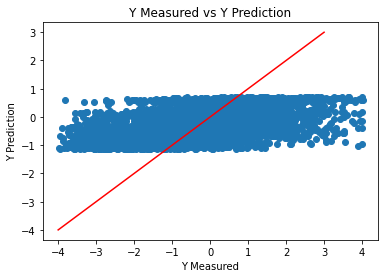

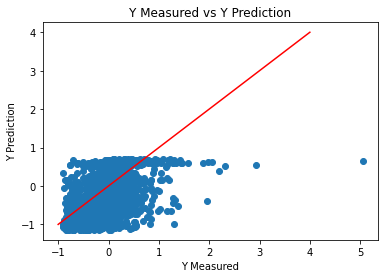

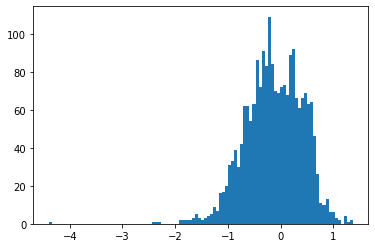

In [69]:
rounded = ['max_depth',
           'max_features', 
           'min_samples_split', 
           'min_samples_leaf', 
           'max_leaf_nodes',
           'n_estimators']


treePar = {x: round(adaBO.max['params'][x]) if x in rounded  else adaBO.max['params'][x] for x in DecTreeFeatures }
adaPar = {x: round(adaBO.max['params'][x]) if x in rounded else adaBO.max['params'][x] for x in AdaFeatures }

tree = DecisionTreeRegressor(**treePar)

adaPar['base_estimator']=tree
adaPar['random_state']=42
ada = AdaBoostRegressor(**adaPar)

print(tree)
print(ada)

ada.fit(X_train_fitted,
        y_train.profitRatio_BoxCox)
ypred = ada.predict(X_test_fitted)
ypredTrain = ada.predict(X_train_fitted)

plotPredVsMeasured(ypredTrain, y_train.profitRatio_BoxCox)
plotPredVsMeasured(ypred, y_test.profitRatio_BoxCox)
plotErrorHist(ypred, y_test.profitRatio_BoxCox)

In [ ]:
knnModel = KNearest